# Computer Security: Homework 1

### By: Mateo Pozo R.

## PicoCTF

### Problem 1: interencdec

In [43]:
ciphertext = 'YidkM0JxZGtwQlRYdHFhR3g2YUhsZmF6TnFlVGwzWVROclgyZzBOMm8yYXpZNWZRPT0nCg=='

#### Solution 1

Since the ciphertext ends with '==', we can assume this is a Base64 encoded string. To decode it, we use an online Base64 decoder tool available in: https://www.base64decode.org/

We get the following result: *b'd3BqdkpBTXtqaGx6aHlfazNqeTl3YTNrX2g0N2o2azY5fQ=='*

Again, the text inside the quotes takes the form of a Base64 encoded string, so we use the base64 decoder tool again. We get the following result: *wpjvJAM{jhlzhy_k3jy9wa3k_h47j6k69}*

This is similar to the format of picoCTF flags: picoCTF{flag}

To break this ciphertext, we use a Caesar Cipher decoder tool, and get the following result:

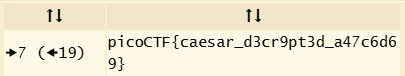

#### Solution 2

Since the ciphertext is a Base64 encoded string, we can use the terminal to decode it. Applying the decoding twice we get this output:

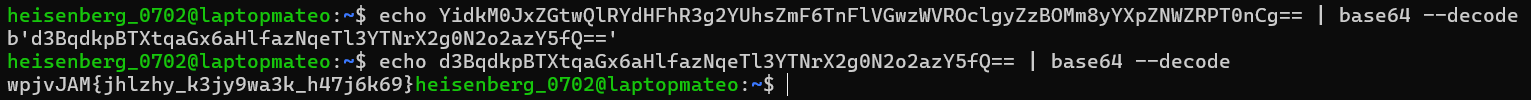

Again, using a brute force Caesar Cipher decoder, we get the following result:

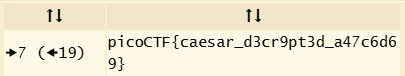

### Problem 2: The numbers

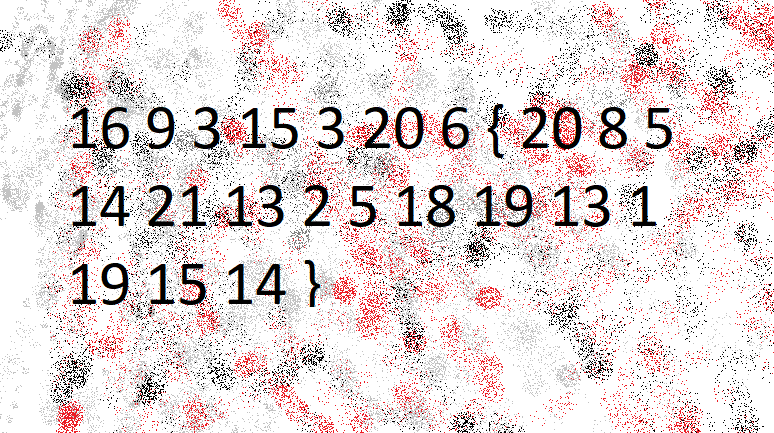

#### Solution 1

Following the format of picoCTF flags, it's clear that the numbers represent a direct mapping to the alphabet.

In [44]:
# Define a dictionary with the number and letter of the alphabet
alphabet_dict = {i: chr(64 + i) for i in range(1, 27)}

# Print the dictionary
print(alphabet_dict)

{1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J', 11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O', 16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T', 21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z'}


In [45]:
# Define a list with the numbers
numbers_list = [16, 9, 3, 15, 3, 20, 6, '{', 20, 8, 5, 14, 21, 13, 2, 5, 18, 19, 13, 1, 19, 15, 14, '}']

# Define the alphabet dictionary
alphabet_dict = {i: chr(64 + i) for i in range(1, 27)}

# Replace the numbers with the characters
flag = ''.join([alphabet_dict[number] if isinstance(number, int) else number for number in numbers_list])

# Print the flag
print(flag)


PICOCTF{THENUMBERSMASON}


#### Solution 2

We know the string that makes the ciphertext: *16 9 3 15 3 20 6 { 20 8 5 14 21 13 2 5 18 19 13 1 19 15 14 }*

We can use an online tool to determine the type of cipher that is used. This is available at: https://www.dcode.fr/cipher-identifier. Then, we get the following result for the identified cipher method.

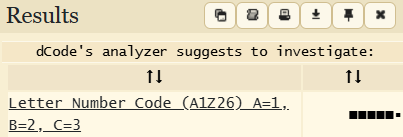

With the same tool, we get the following plaintext: *PICOCTFTHENUMBERSMASON*. This is adapted to the picoCTF flag format: *PICOCTF{THENUMBERSMASON}*

### Problem 3: Custom encryption

#### Code

In [46]:
from random import randint
import sys


def generator(g, x, p):
    return pow(g, x) % p


def encrypt(plaintext, key):
    cipher = []
    for char in plaintext:
        cipher.append(((ord(char) * key*311)))
    return cipher

def is_prime(p):
    v = 0
    for i in range(2, p + 1):
        if p % i == 0:
            v = v + 1
    if v > 1:
        return False
    else:
        return True


def dynamic_xor_encrypt(plaintext, text_key):
    cipher_text = ""
    key_length = len(text_key)
    for i, char in enumerate(plaintext[::-1]):
        key_char = text_key[i % key_length]
        encrypted_char = chr(ord(char) ^ ord(key_char))
        cipher_text += encrypted_char
    return cipher_text

def test(plain_text, text_key):
    p = 97
    g = 31
    if not is_prime(p) and not is_prime(g):
        print("Enter prime numbers")
        return
    a = randint(p-10, p)
    b = randint(g-10, g)
    print(f"a = {a}")
    print(f"b = {b}")
    u = generator(g, a, p)
    v = generator(g, b, p)
    key = generator(v, a, p)
    b_key = generator(u, b, p)
    shared_key = None
    if key == b_key:
        shared_key = key
    else:
        print("Invalid key")
        return
    semi_cipher = dynamic_xor_encrypt(plain_text, text_key)
    cipher = encrypt(semi_cipher, shared_key)
    print(f'cipher is: {cipher}')

#### Solution 1

In [47]:
def get_semi_cipher(cipher_text, key):
  """
  Get the characters corresponding to the semi ciphered text.
  """
  semi_cipher = []
  for char in cipher_text:
    semi_cipher.append(chr(char // (key * 311)))

  return ''.join(semi_cipher)

def dynamic_xor_decrypt(plaintext, text_key):
  """
  Apply xor decryption and then reversing the resulting string to reverse the
  encryption process.
  """
  decrypted_text = []
  key_length = len(text_key)

  for i, char in enumerate(plaintext):
      key_char = text_key[i % key_length]
      decrypted_char = chr(ord(char) ^ ord(key_char))
      decrypted_text.append(decrypted_char)

  return ''.join(decrypted_text[::-1])

def break_cipher(message, p, g, a, b):
  """
  Function to reverse the whole cipher process.
  """
  # Compute shared key
  shared_key = None

  u = generator(g, a, p)
  v = generator(g, b, p)
  key = generator(v, a, p)
  b_key = generator(u, b, p)

  if key == b_key:
    shared_key = key
  else:
    print("Invalid key")
    return

  # Get semi ciphered text
  semi_cipher = get_semi_cipher(message, shared_key)

  # Get plaintext
  plain_text = dynamic_xor_decrypt(semi_cipher, "trudeau")
  print("plain_text:", plain_text)

In [48]:
message = [61578, 109472, 437888, 6842, 0, 20526, 129998, 526834, 478940, 287364, 0, 567886, 143682, 34210, 465256, 0, 150524, 588412, 6842, 424204, 164208, 184734, 41052, 41052, 116314, 41052, 177892, 348942, 218944, 335258, 177892, 47894, 82104, 116314]
break_cipher(message, 97, 31, 90, 26)

plain_text: picoCTF{custom_d2cr0pt6d_49fbee5b}


#### Solution 2

In [72]:
def get_semi_cipher(cipher_text, key):
  """
  Get the characters corresponding to the semi ciphered text.
  """
  semi_cipher = []
  for char in cipher_text:
    semi_cipher.append(chr(char // (key * 311)))

  return ''.join(semi_cipher)

def dynamic_xor_decrypt(plaintext, text_key):
    """
    Apply xor decryption in reversed strings three times results in the result
    """
    cipher_text = []
    key_length = len(text_key)

    for i, char in enumerate(plaintext[::-1]):
      key_char = text_key[i % key_length]
      decrypted_char = chr(ord(char) ^ ord(key_char))
      cipher_text.append(decrypted_char)

    plaintext = ''.join(cipher_text)
    cipher_text = []

    for i, char in enumerate(plaintext[::-1]):
      key_char = text_key[i % key_length]
      decrypted_char = chr(ord(char) ^ ord(key_char))
      cipher_text.append(decrypted_char)

    plaintext = ''.join(cipher_text)
    cipher_text = []

    for i, char in enumerate(plaintext[::-1]):
      key_char = text_key[i % key_length]
      decrypted_char = chr(ord(char) ^ ord(key_char))
      cipher_text.append(decrypted_char)

    return ''.join(cipher_text)

def break_cipher(message, p, g, a, b):
  """
  Function to reverse the whole cipher process.
  """
  # Compute shared key
  shared_key = None

  u = generator(g, a, p)
  v = generator(g, b, p)
  key = generator(v, a, p)
  b_key = generator(u, b, p)

  if key == b_key:
    shared_key = key
  else:
    print("Invalid key")
    return

  # Get semi ciphered text
  semi_cipher = get_semi_cipher(message, shared_key)

  # Get plaintext
  plain_text = dynamic_xor_decrypt(semi_cipher, "trudeau")
  print("plain_text:", plain_text)

In [73]:
message = [61578, 109472, 437888, 6842, 0, 20526, 129998, 526834, 478940, 287364, 0, 567886, 143682, 34210, 465256, 0, 150524, 588412, 6842, 424204, 164208, 184734, 41052, 41052, 116314, 41052, 177892, 348942, 218944, 335258, 177892, 47894, 82104, 116314]
break_cipher(message, 97, 31, 90, 26)

plain_text: picoCTF{custom_d2cr0pt6d_49fbee5b}


### Problem 4: C3

#### Code

In [88]:
import sys
chars = ""
from fileinput import input

input = "hello"

for line in input:
  chars += line

lookup1 = "\n \"#()*+/1:=[]abcdefghijklmnopqrstuvwxyz"
lookup2 = "ABCDEFGHIJKLMNOPQRSTabcdefghijklmnopqrst"

out = ""

prev = 0
for char in chars:
  cur = lookup1.index(char)
  out += lookup2[(cur - prev) % 40]
  prev = cur

sys.stdout.write(out)

brHAD

#### Solution 1

In [95]:
def decrypt_cyclical(ciphertext):
  lookup1 = "\n \"#()*+/1:=[]abcdefghijklmnopqrstuvwxyz"
  lookup2 = "ABCDEFGHIJKLMNOPQRSTabcdefghijklmnopqrst"

  out = ""

  # We reverse the encryption process in the loop
  prev = 0
  for char in ciphertext:
    cur = lookup2.index(char)
    out += lookup1[(cur + prev) % 40]
    prev = cur + prev % 40

  print(out)

In [96]:
decrypt_cyclical("DLSeGAGDgBNJDQJDCFSFnRBIDjgHoDFCFtHDgJpiHtGDmMAQFnRBJKkBAsTMrsPSDDnEFCFtIbEDtDCIbFCFtHTJDKerFldbFObFCFtLBFkBAAAPFnRBJGEkerFlcPgKkImHnIlATJDKbTbFOkdNnsgbnJRMFnRBNAFkBAAAbrcbTKAkOgFpOgFpOpkBAAAAAAAiClFGIPFnRBaKliCgClFGtIBAAAAAAAOgGEkImHnIl")

#asciiorder
#fortychars
#selfinput
#pythontwo

chars = ""
from fileinput import input
for line in input():
    chars += line
b = 1 / 1

for i in range(len(chars)):
    if i == b * b * b:
        print chars[i] #prints
        b += 1 / 1



Running the script and passing itself as input in the terminal with python 2, we get the flag:

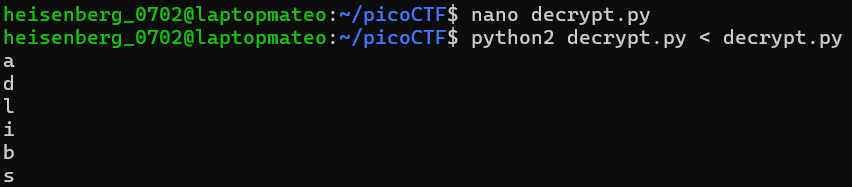

#### Solution 2

In [98]:
def decrypt_cyclical(ciphertext):
  lookup1 = "\n \"#()*+/1:=[]abcdefghijklmnopqrstuvwxyz"
  lookup2 = "ABCDEFGHIJKLMNOPQRSTabcdefghijklmnopqrst"

  out = ""

  # We reverse the encryption process in the loop
  prev = 0
  for char in ciphertext:
    cur = lookup2.index(char)
    out += lookup1[(cur + prev) % 40]
    prev = cur + prev % 40

  return out

Alternatively, we can modify the decrypted python code to be a python 3 program and get the flag.

In [99]:
#asciiorder
#fortychars
#selfinput
#pythontwo

chars = ""
from fileinput import input

input = decrypt_cyclical("DLSeGAGDgBNJDQJDCFSFnRBIDjgHoDFCFtHDgJpiHtGDmMAQFnRBJKkBAsTMrsPSDDnEFCFtIbEDtDCIbFCFtHTJDKerFldbFObFCFtLBFkBAAAPFnRBJGEkerFlcPgKkImHnIlATJDKbTbFOkdNnsgbnJRMFnRBNAFkBAAAbrcbTKAkOgFpOgFpOpkBAAAAAAAiClFGIPFnRBaKliCgClFGtIBAAAAAAAOgGEkImHnIl")

for line in input:
    chars += line
b = 1 / 1

for i in range(len(chars)):
    if i == b * b * b:
        print(chars[i]) #prints
        b += 1 / 1

a
d
l
i
b
s


### Problem 5: Rotation

#### Solution 1

Since the encrypted flag follows the format of picoCTF flag, we try to solve for a Caesar Cipher with brute force.

Using an online tool to get the possible Caesar Cipher results available at: https://www.dcode.fr/caesar-cipher, we get the following flag:

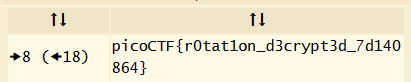

#### Solution 2

The ciphertext is: *xqkwKBN{z0bib1wv_l3kzgxb3l_7l140864}*. It clearly follows the format of a picoCTF flag because the curly brackets are present.


In [101]:
# We try for a simple shift cipher
alphabet = "abcdefghijklmnopqrstuvwxyz"
ciphertext = "xqkwKBN{z0bib1wv_l3kzgxb3l_7l140864}".lower()

# If x corresponds to p, then there's a shift of 8
plaintext = []
for char in ciphertext:
  if char in alphabet:
    plaintext.append(alphabet[(alphabet.index(char) - 8) % 26])
  else:
    plaintext.append(char)

print("".join(plaintext))

picoctf{r0tat1on_d3crypt3d_7d140864}
